##**Obtenção das bases de imagens:**
*Baixar as imagens de teste diretamente do github*

*Obs.: Desta forma as imagens ficarão disponíveis somente enquanto esta sessão permanecer ativa ou até que o usuário  clique em no menu: Runtime>Factory reset runtime*

In [ ]:
!git clone https://github.com/guimota-uerj/TestImages.git
!pwd
!ls

Cloning into 'TestImages'...
remote: Enumerating objects: 104, done.
remote: Total 104 (delta 0), reused 0 (delta 0), pack-reused 104
Receiving objects: 100% (104/104), 19.32 MiB | 30.53 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content
sample_data  TestImages


# **Questão 1:**

Utilizando a imagem colorida TestImages/PorDoSol/PorDoSol.tiff baixada do github, implemente  e demosnstre as diferenças (em termos de tamanho do arquivo em bytes e da raiz do erro quadrático médio entre a imagem original e versões a serem salvas nos formatos de arquivo a seguir:

* jpeg com fator de qualidade de 25%
* jpeg com fator de qualidade de 50%
* jpeg com fator de qualidade de 75%
* jpeg com fator de qualidade de 100%
* TIFF - Com compressãão LZW (por padrão o openCV salva o formato tiff com este tipo de compressão)

A raiz do erro quadrático médio entre as imagens $I(x,y)$ e $I'(x,y)$ pode ser obtida pela seguinte expressão:

$${\displaystyle \operatorname {RMSE}}(I,I') = \sqrt{\frac{\sum _{x=0}^{M-1} \sum _{y=0}^{N-1} \left ({I(x,y)-I'(x,y)}\right)^2}{NM}}$$

Em Python, este valor pode se calculado como no código exemplo a seguir:

In [ ]:
import numpy as np
import sklearn.metrics as skl_m

y_true = np.float32([[0.5, 1],[-1, 1],[7, -6]])
y_pred = np.float32([[0, 2],[-1, 2],[8, -5]])

print ('RMSE = ',np.sqrt(skl_m.mean_squared_error(y_true,y_pred)))


RMSE =  0.8416254


*Entrar na pasta da imagem de teste utilizada na questão 1*

In [ ]:
%cd /content/TestImages/PorDoSol/

/content/TestImages/PorDoSol


**Modifique o código a seguir para que você obtenta as informações necessárias para a execução da análise dos resultados solicitados na questão 1.**

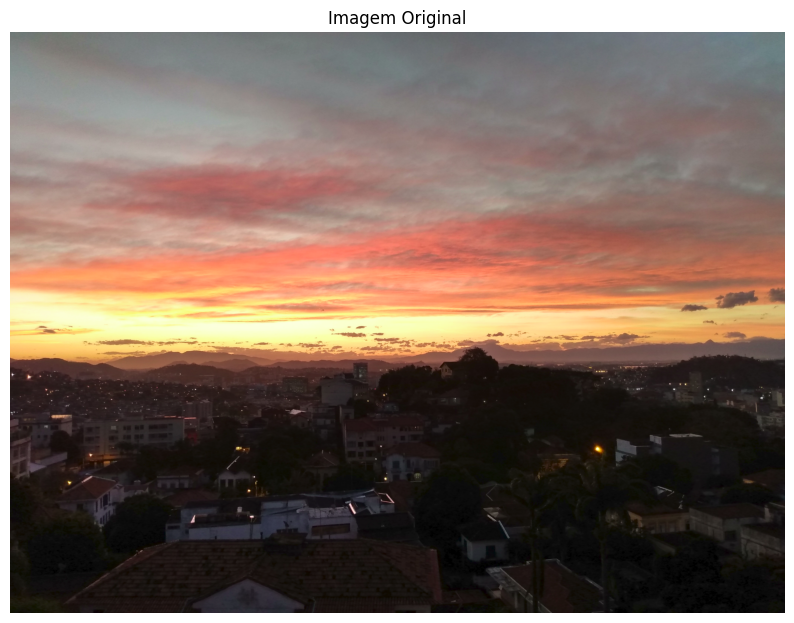

total 27852
drwxr-xr-x  2 root root     4096 Sep 25 19:45 .
drwxr-xr-x 10 root root     4096 Sep 25 19:44 ..
-rw-r--r--  1 root root  4652528 Sep 25 19:56 compress_100.jpg
-rw-r--r--  1 root root   233009 Sep 25 19:56 compress_10.jpg
-rw-r--r--  1 root root   287679 Sep 25 19:56 compress_25.jpg
-rw-r--r--  1 root root   382902 Sep 25 19:56 compress_50.jpg
-rw-r--r--  1 root root   596175 Sep 25 19:56 compress_75.jpg
-rw-r--r--  1 root root  9957186 Sep 25 19:56 compress_lzw.tiff
-rw-r--r--  1 root root 11167608 Sep 25 19:44 PorDoSol.tiff
-rw-r--r--  1 root root   931653 Sep 25 19:44 RecortePorDoSol.tiff
-rw-r--r--  1 root root   287651 Sep 25 19:45 temp.jpg
RMSE da imagem JPEG comprimida com fator de qualidade 10 %:  3.520003549383521
RMSE da imagem JPEG comprimida com fator de qualidade 25 %:  2.0225663269637058
RMSE da imagem JPEG comprimida com fator de qualidade 50 %:  1.4824310885577396
RMSE da imagem JPEG comprimida com fator de qualidade 75 %:  1.157282942573508
RMSE da imagem J

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

img = cv2.imread('PorDoSol.tiff')
plt.figure(figsize = (10,10))
plt.title('Imagem Original')
plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Incluir código para criar as imagens as 5 imagens solicitadas na questão
img_name = ["compress_10.jpg", "compress_25.jpg", "compress_50.jpg", "compress_75.jpg", "compress_100.jpg", "compress_lzw.tiff"]
compression_factor = [10,25,50,75,100,5]
for i in range(0,5):
  cv2.imwrite(img_name[i], img, [cv2.IMWRITE_JPEG_QUALITY, compression_factor[i]])
cv2.imwrite(img_name[5],img,[cv2.IMWRITE_TIFF_COMPRESSION, compression_factor[5]]) #flag 5 eh para o lzw

# Verificando os arquivos gerados
!ls -la

# Modifique o código abaixo para ler cada uma das imagens
imgs_compressed = []
sizes = []
for j in range(0,6):
  imgs_compressed.append(cv2.imread(img_name[j]))
  sizes.append(os.stat(img_name[j]).st_size)

# complete a função abaixo para obter o erro quadrático médio entre as imagens
def mse(imageA, imageB):

  err = np.sqrt(skl_m.mean_squared_error(cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY),cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)))
  return err

#Complete o código para exibir o erro quadrático médio em relação a original
for i in range(0,6):
  if i<5:
    print('RMSE da imagem JPEG comprimida com fator de qualidade',compression_factor[i],'%: ', mse(img,imgs_compressed[i]) )
  else:
    print('RMSE da imagem TIFF comprimida com o algoritmo LZW:', mse(img,imgs_compressed[i]) )


Imagem            | RMSE
------------------| ----
"compress_10.jpg" | 3.520003549383521
"compress_25.jpg" | 2.0225663269637058
"compress_50.jpg" | 1.4824310885577396
"compress_75.jpg" | 1.157282942573508
"compress_100.jpg"| 0.2749401775079204
"compress_lzw.tiff"| 0.0

1. O erro aumenta conforte o fator de qualidade reduz, ou seja, as imagens são drasticamente diferentes.
2. Mesmo fator de qualidade 100% ainda há um erro, nem tão pequeno
3. Na imagem comprimida usando o algoritmo lzw, o erro encontrado fo nulo

###Tamanho
Imagem             | tamanho (bytes)
-------------------| ----
orignal            | 11167608
"compress_10.jpg"  | 233009
"compress_25.jpg"  | 287679
"compress_50.jpg"  | 382902
"compress_75.jpg"  | 596175
"compress_100.jpg" | 4652528
"compress_lzw.tiff"| 9957186

1. Quanto menor o tamanho do arquivo, menor a informação guardada, dessa forma, a imagem com fator de qualidade 10, será drasticamente menor


###imagem que compara os dados:
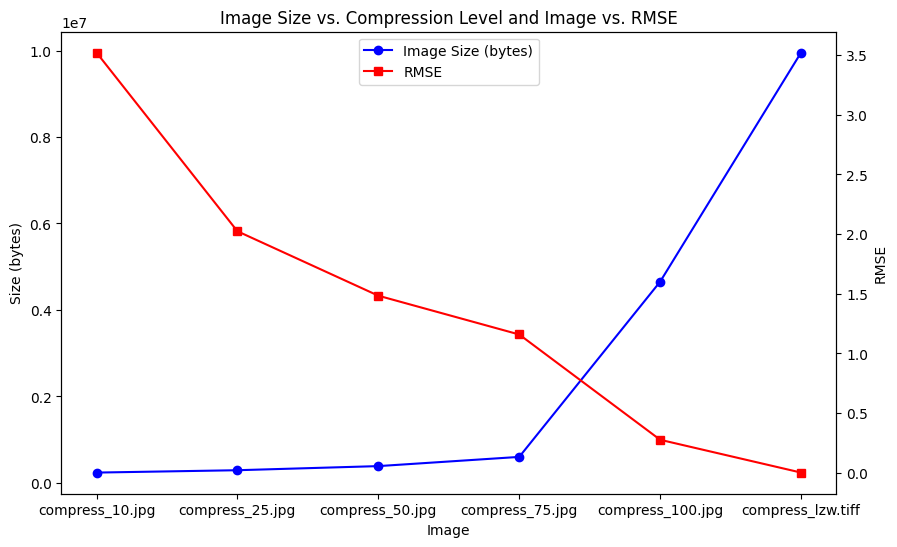



# **Questão 2:**

Salve a imagem PorDoSol.tiff sucessivamente (ao longo de 100 iterações) no formato JPEG com fator de qualidade de 70% e apresente o gráfico da evolução do RMSE adicionado a cada salvamento. Fique atento, pois para obter o resultado esperado, será necessário carregar a imagem salva na iteração anterior antes que esta seja sobrescrita. Assim, o erro irá se acumulando iteração a iteração. Compare quantitativamente e qualitativamente a última imagem salva à imagem com fator de qualidade de 10% e à imagem original. Comente os resultados.

Text(0.5, 1.0, 'Imagem Compressão sucessiva - MSE 2.024832393470369')

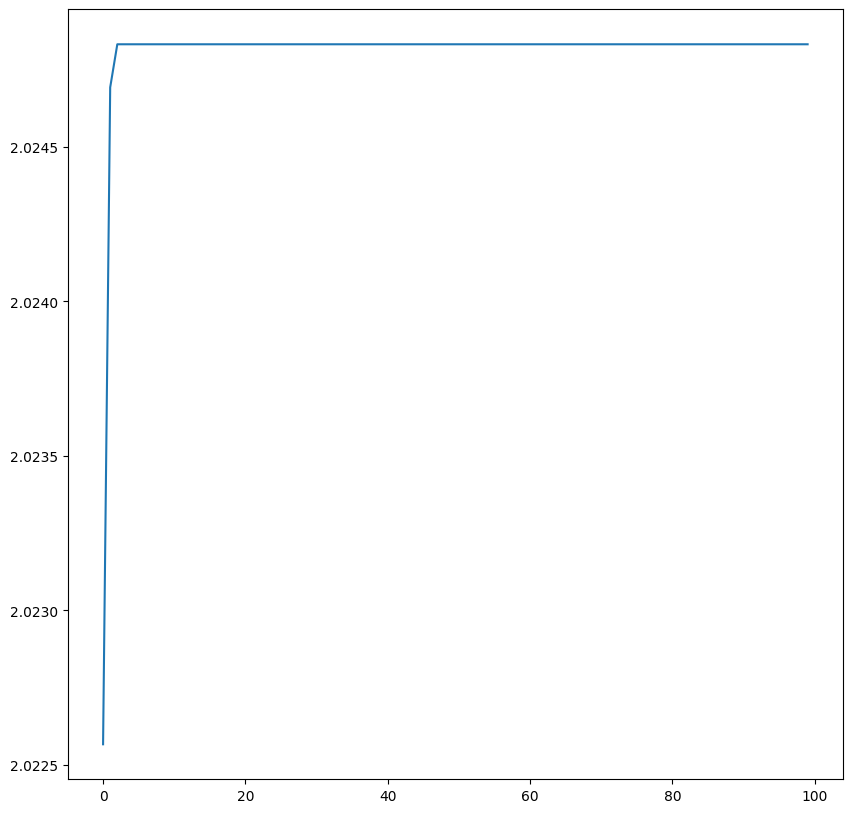

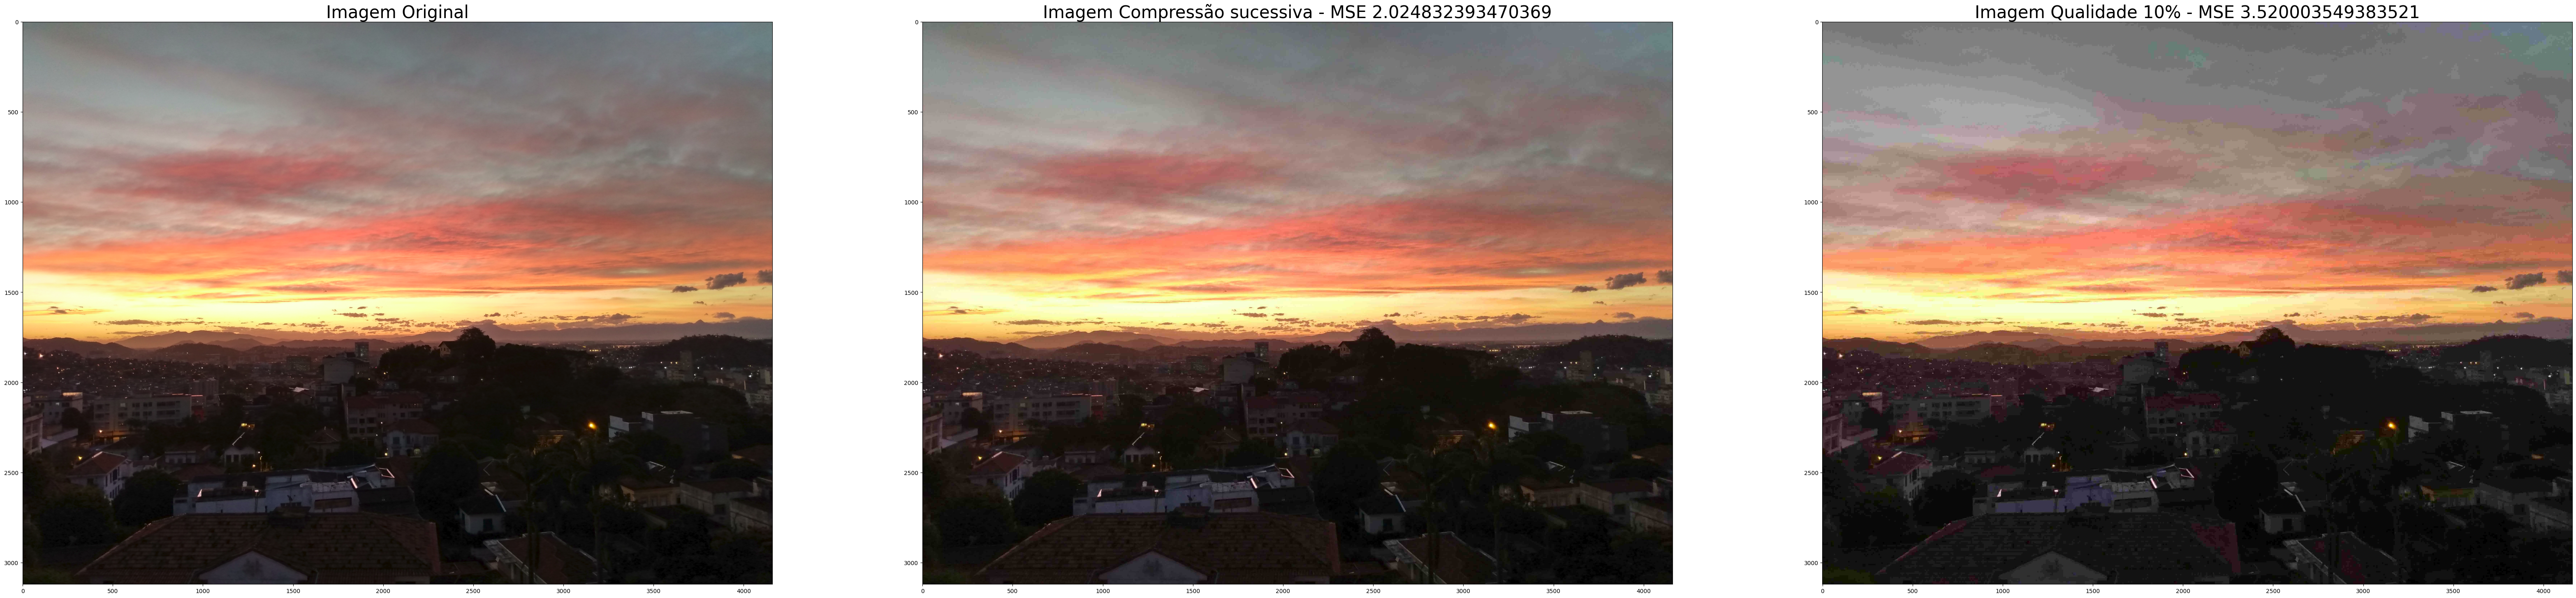

In [ ]:
# Modifique o presente código
def compJPEG(img, quality):
  !rm temp.jpg
  cv2.imwrite("temp.jpg", img, [cv2.IMWRITE_JPEG_QUALITY, quality])
  img_jpg = cv2.imread("temp.jpg")
  return img_jpg

imgcompr = img;
erro = [0]

for i in range(100):
  prev_img, imgcompr = imgcompr, compJPEG(imgcompr,25)
  erro = erro + [mse(img,imgcompr)]

  if i ==99:
    imgfinal = imgcompr

plt.figure(figsize=(10, 10))
plt.plot( erro[1:], label="Successive compression")

# Comaparativo de iamgens
fig, axs = plt.subplots(1,3)
fig.set_size_inches(w=80,h=50)

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Imagem Original', fontsize=30)

axs[2].imshow(cv2.cvtColor(imgs_compressed[0], cv2.COLOR_BGR2RGB))
axs[2].set_title('Imagem Qualidade 10% - MSE ' +
                 str(mse(img,imgs_compressed[0])), fontsize=30)

axs[1].imshow(cv2.cvtColor(imgfinal, cv2.COLOR_BGR2RGB))
axs[1].set_title('Imagem Compressão sucessiva - MSE ' +
                 str(erro[99]), fontsize=30)

### Observações
1. O erro evolui em escala logarítmica, mas atinge um ponto de estabilidade, a partir do qual, torna-se constante.
2. A olho nu, a diferença não é muito perceptivel quando comparada com o a perda de qualidade da imagem salva no fator de qualidade 10%.
3. O erro da 100º imagem é $2.024832393470369$, enquanto o da salva em 10% é $3.520003549383521$

    > Ou seja, o resultado é esperado, já que, mesmo diante de sucessivas perdas de qualidade, a perda ainda é drasticamente, menor em relação à apenas uma compressão no fator 10%

### Dados

| Line Number | Values                |
 -------------|-----------------------
| 1           | 2.0225663269637058    |
| 2           | 2.024692856634825     |
| 3           | 2.024832393470369     |
| 4           | 2.024832393470369     |
| 5           | 2.024832393470369     |
| 6           | 2.024832393470369     |
| 7           | 2.024832393470369     |
|...          | ...                   |
|100          | 1.2484746610524142    |

  > A partir da 3º iteração os valores permaneceram constantes

# **Questão 3:**

Utilizando as imagens vetoriais em formato PDF das logos da Uerj e do Laboratório de Processamento Gráfico do IME-Uerj:  /content/TestImages/Logos/logo_LPG_visor.pdf e  /content/TestImages/Logos/logo_uerj_cor.pdf, compare os tamanhos e a qualidade dos arquivos orignais e os mesmos convertidos para os formatos PPM e PNG com 75, 150 e 300 dpi.

*Instalação das bibliotecas de PDF do Python e das repectivas dependências*

In [ ]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


*Seleção do diretório onde estão as imagens de entrada e apresentação de seu conteúdo*

In [ ]:
%cd /content/TestImages/Logos/
!ls -la

/content/TestImages/Logos
total 500
drwxr-xr-x  2 root root   4096 Sep 25 19:44 .
drwxr-xr-x 10 root root   4096 Sep 25 19:44 ..
-rw-r--r--  1 root root  36235 Sep 25 19:44 CCompLogo1.png
-rw-r--r--  1 root root 458351 Sep 25 19:44 logo_LPG_visor.pdf
-rw-r--r--  1 root root   7419 Sep 25 19:44 logo_uerj_cor.pdf


In [ ]:
!ls
from pdf2image import convert_from_path
from google.colab.patches import cv2_imshow
def converte(file_name):
  img = []
  dpi_index = [75, 150, 300]
  for i in range(3):
    img.append(convert_from_path(file_name, dpi = dpi_index[i]))
  return img

lpg75, lpg150, lpg300 = converte('logo_LPG_visor.pdf')
uerj75, uerj150, uerj300= converte('logo_uerj_cor.pdf')
#Saving pages in png and ppm format
#LPG
for page in lpg75:
  page.save('logo_lpg75.png', 'PNG')
for page in lpg150:
  page.save('logo_lpg150.png', 'PNG')
for page in lpg300:
  page.save('logo_lpg300.png', 'PNG')
for page in lpg75:
  page.save('logo_lpg75.ppm', 'PPM')
for page in lpg150:
  page.save('logo_lpg150.ppm', 'PPM')
for page in lpg300:
  page.save('logo_lpg300.ppm', 'PPM')

#UERJ
for page in uerj75:
  page.save('uerj75.png', 'PNG')
for page in uerj150:
  page.save('uerj150.png', 'PNG')
for page in uerj300:
  page.save('uerj300.png', 'PNG')
for page in uerj75:
  page.save('uerj75.ppm', 'PPM')
for page in uerj150:
  page.save('uerj150.ppm', 'PPM')
for page in uerj300:
  page.save('uerj300.ppm', 'PPM')

!ls -al

CCompLogo1.png	logo_LPG_visor.pdf  logo_uerj_cor.pdf
total 92812
drwxr-xr-x  2 root root     4096 Sep 25 19:46 .
drwxr-xr-x 10 root root     4096 Sep 25 19:44 ..
-rw-r--r--  1 root root    36235 Sep 25 19:44 CCompLogo1.png
-rw-r--r--  1 root root    45020 Sep 25 19:46 logo_lpg150.png
-rw-r--r--  1 root root 11395016 Sep 25 19:46 logo_lpg150.ppm
-rw-r--r--  1 root root   109744 Sep 25 19:46 logo_lpg300.png
-rw-r--r--  1 root root 45569807 Sep 25 19:46 logo_lpg300.ppm
-rw-r--r--  1 root root    19634 Sep 25 19:46 logo_lpg75.png
-rw-r--r--  1 root root  2851717 Sep 25 19:46 logo_lpg75.ppm
-rw-r--r--  1 root root   458351 Sep 25 19:44 logo_LPG_visor.pdf
-rw-r--r--  1 root root     7419 Sep 25 19:44 logo_uerj_cor.pdf
-rw-r--r--  1 root root    65382 Sep 25 19:46 uerj150.png
-rw-r--r--  1 root root  6530159 Sep 25 19:46 uerj150.ppm
-rw-r--r--  1 root root   148517 Sep 25 19:46 uerj300.png
-rw-r--r--  1 root root 26110061 Sep 25 19:46 uerj300.ppm
-rw-r--r--  1 root root    29189 Sep 25 19:46 

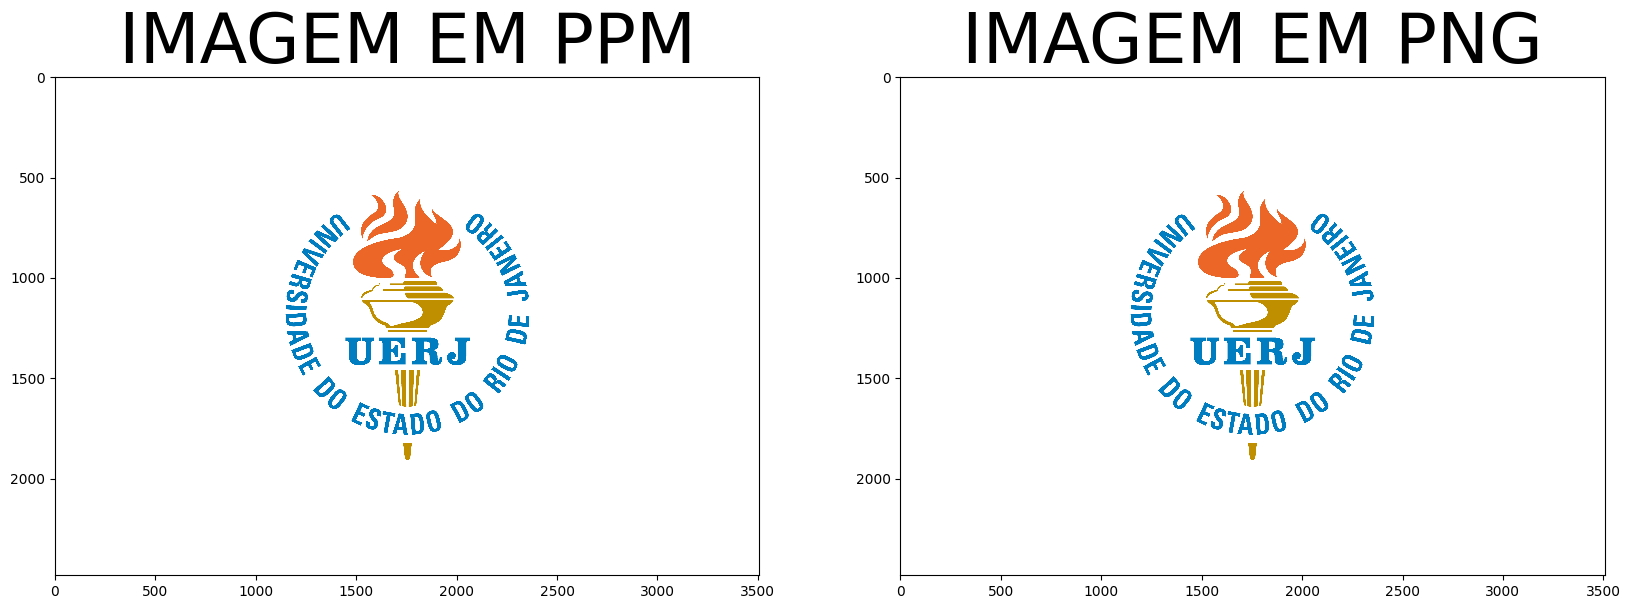

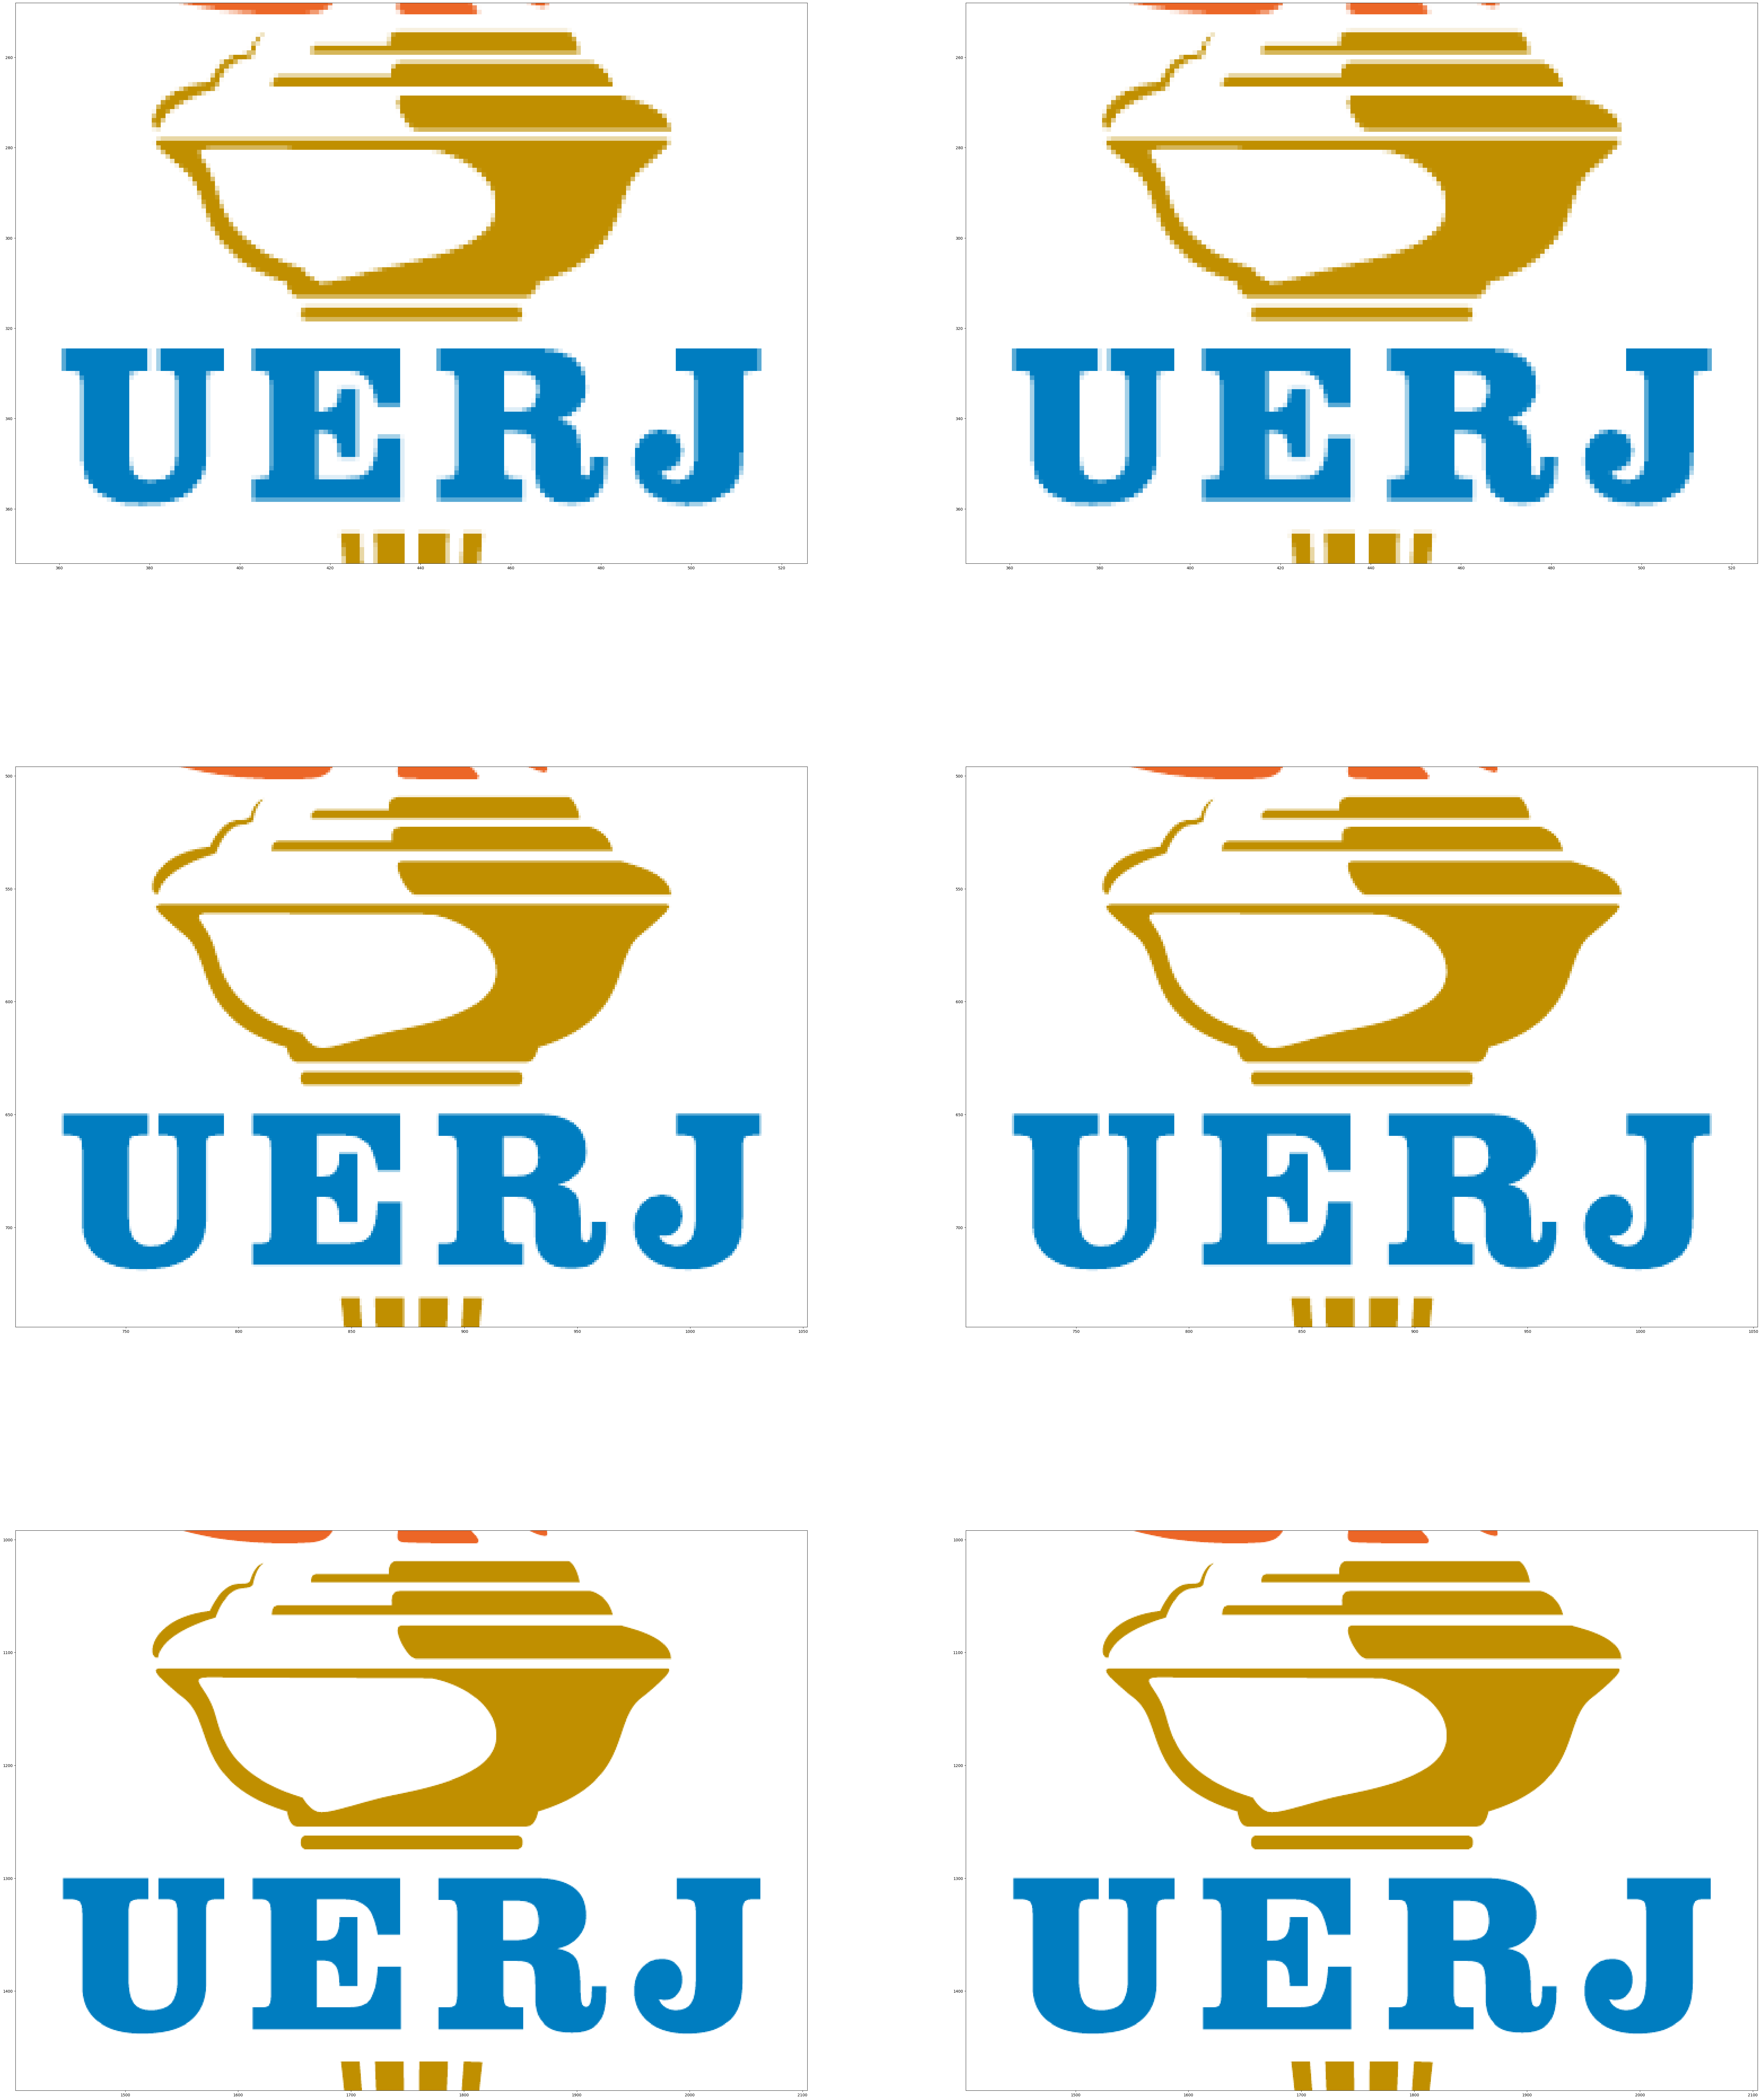

In [ ]:
#!ls
import cv2
import matplotlib.pyplot as plt

#carregamento das imagens
img_uerj = []
img_uerj.append(cv2.imread('uerj75.ppm'))
img_uerj.append(cv2.imread('uerj150.ppm'))
img_uerj.append(cv2.imread('uerj300.ppm'))
img_uerj.append(cv2.imread('uerj75.png'))
img_uerj.append(cv2.imread('uerj150.png'))
img_uerj.append(cv2.imread('uerj300.png'))

fig_orignal, axs_orignal = plt.subplots(1, 2, figsize=(20, 20))
axs_orignal[0].imshow(cv2.cvtColor(img_uerj[2], cv2.COLOR_BGR2RGB),interpolation='nearest')
axs_orignal[0].set_title('IMAGEM EM PPM',fontsize=50)
axs_orignal[1].imshow(cv2.cvtColor(img_uerj[5], cv2.COLOR_BGR2RGB),interpolation='nearest')
axs_orignal[1].set_title('IMAGEM EM PNG',fontsize=50)

#Modifique o código a seguir para exibir as imagens geradas nos diversos
# formatos destacando uma região para comparação qualitativa.
fig, axs = plt.subplots(3,2)
fig.set_size_inches(w=80,h=100)

for i in range(3):
  axs[i,0].imshow(cv2.cvtColor(img_uerj[i], cv2.COLOR_BGR2RGB),interpolation='nearest')
  axs[i,0].margins(x=-0.4, y=-0.4)
  axs[i,1].imshow(cv2.cvtColor(img_uerj[i+3], cv2.COLOR_BGR2RGB),interpolation='nearest')
  axs[i,1].margins(x=-0.4, y=-0.4)

fig.show()

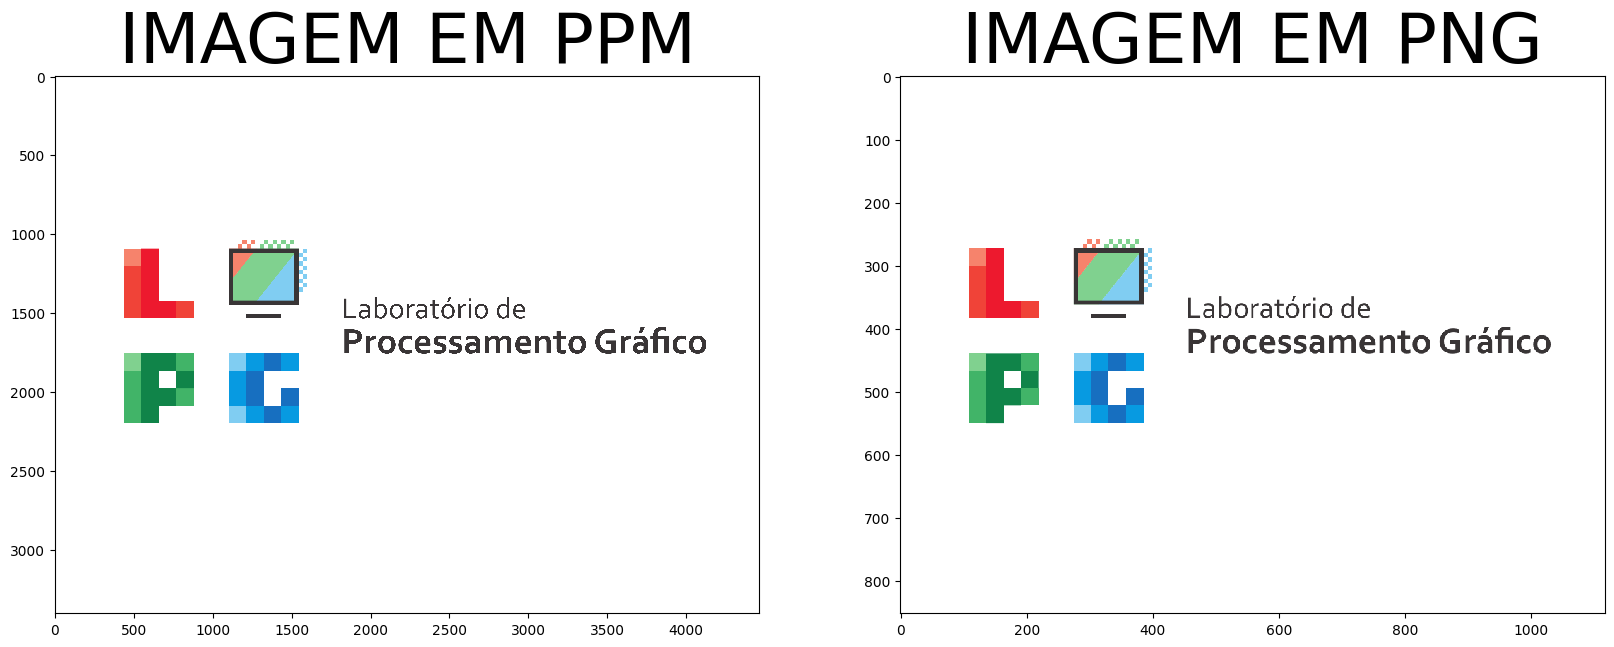

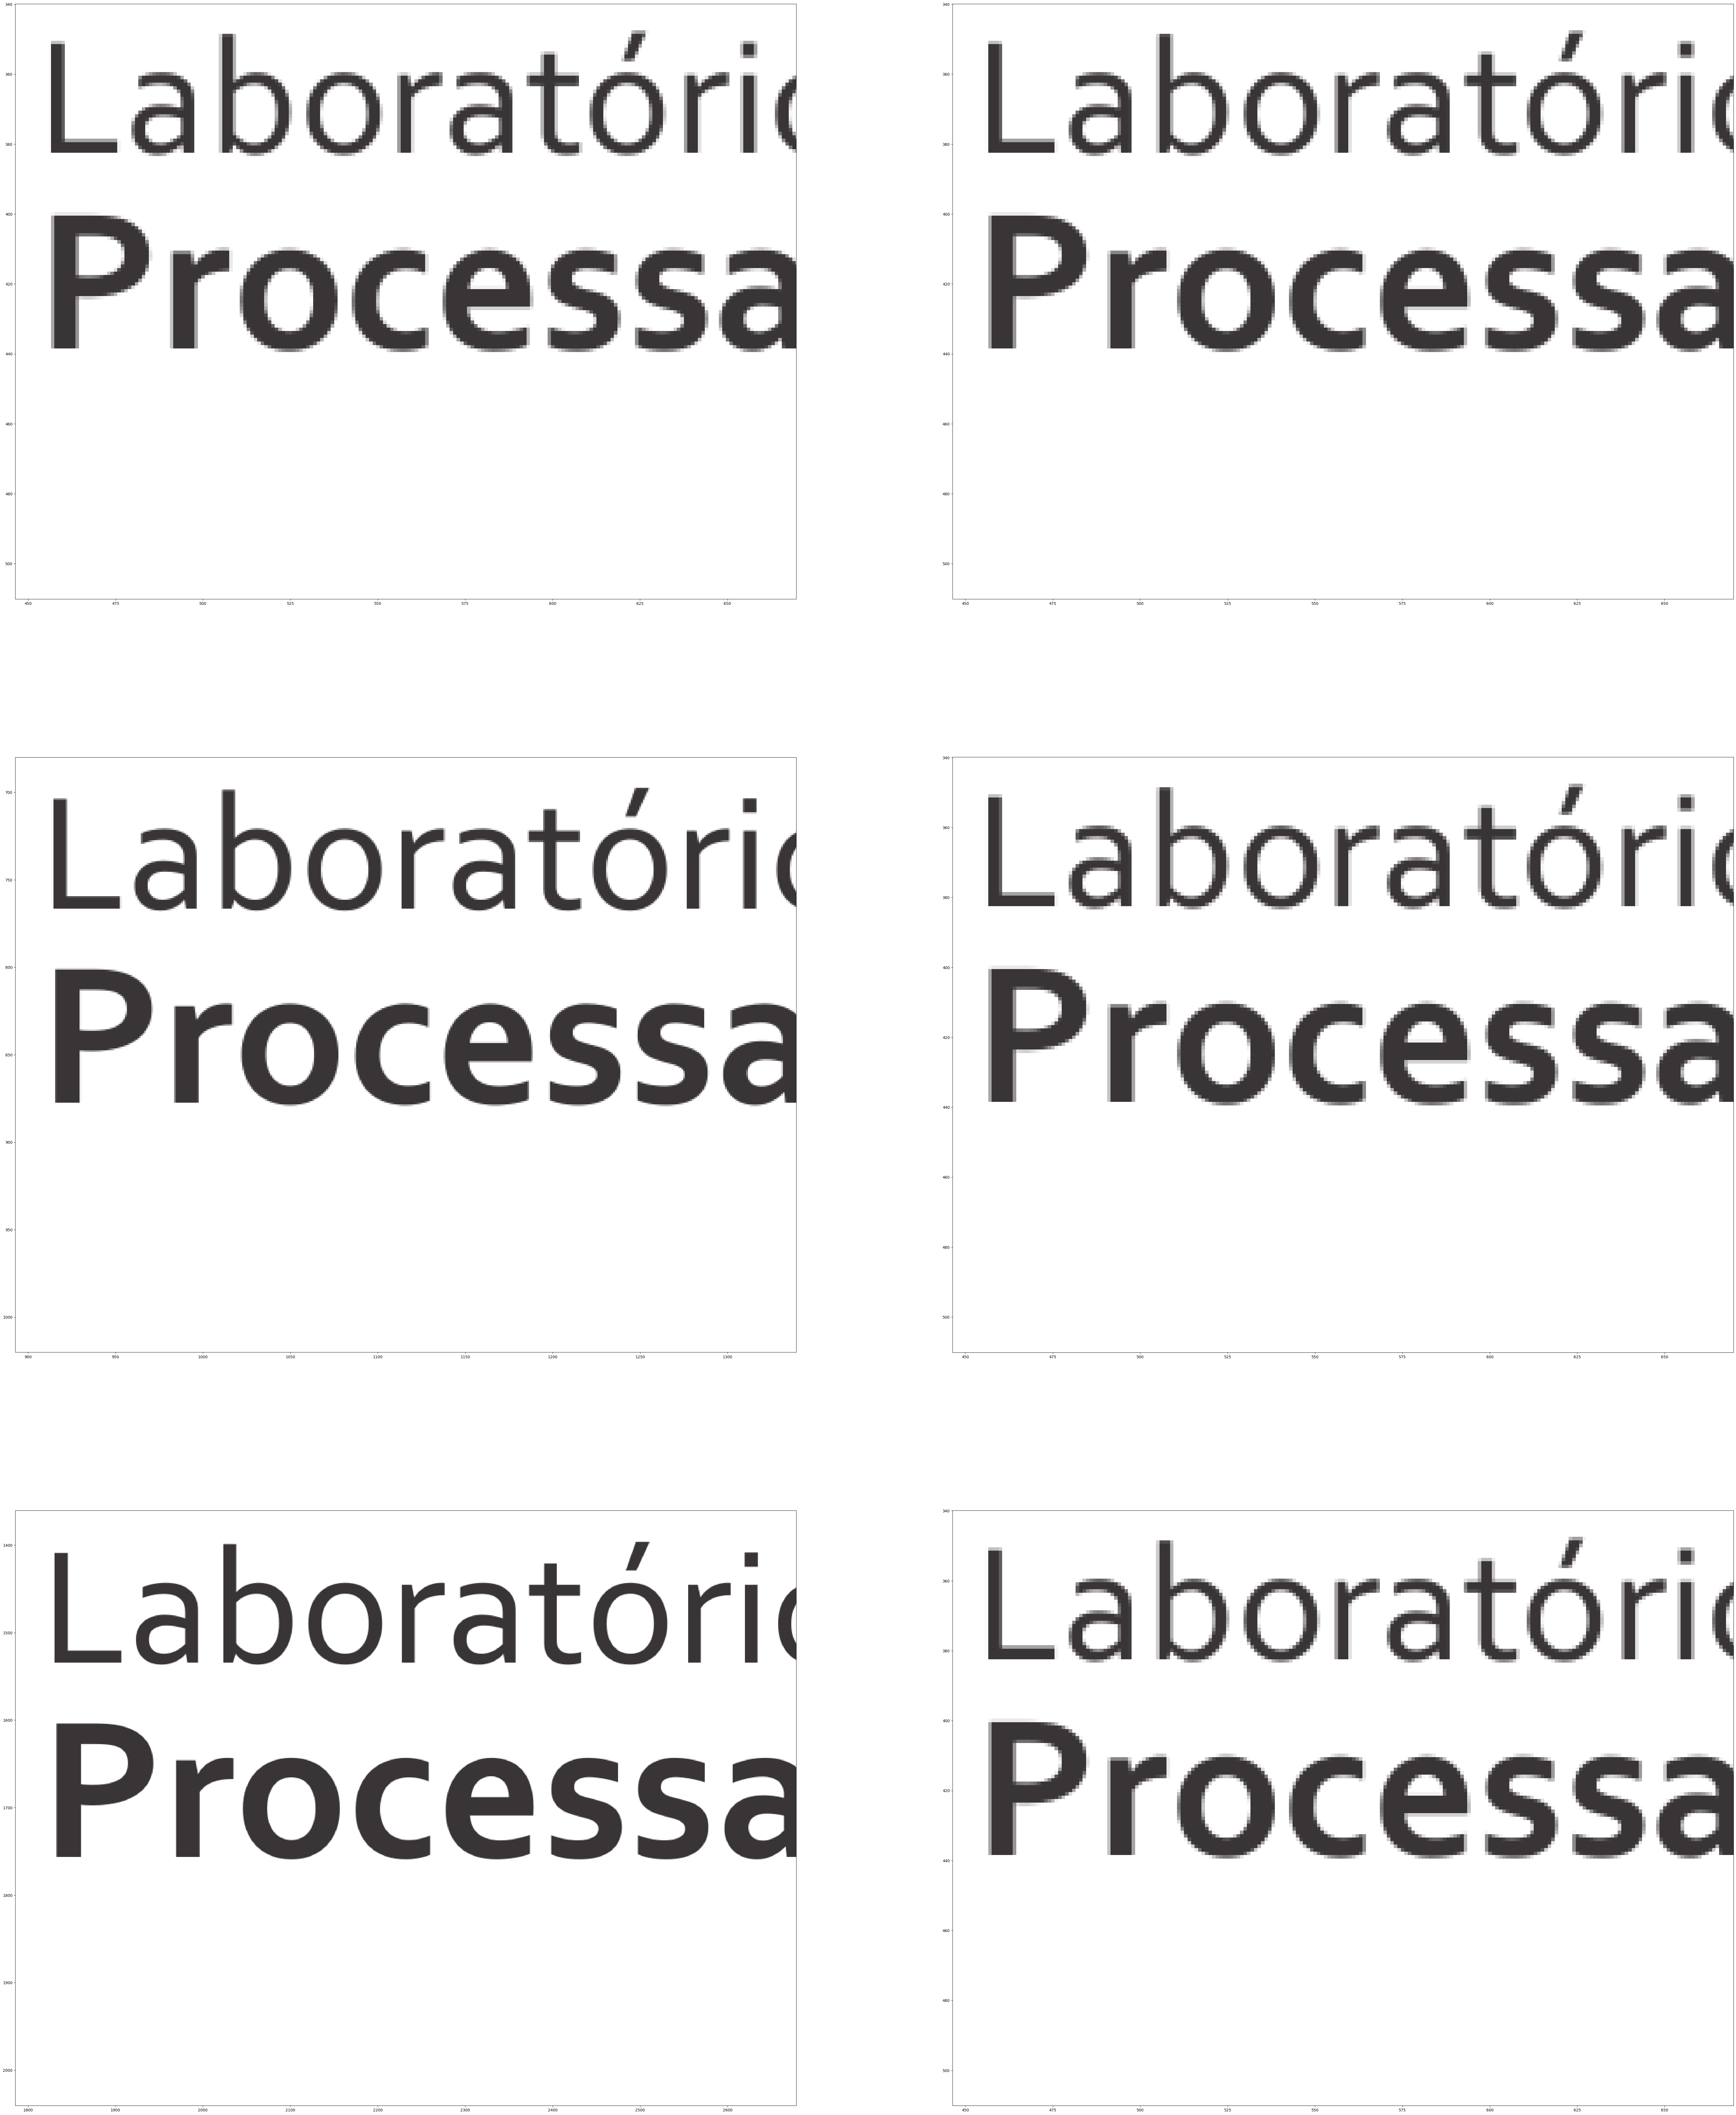

In [ ]:
img_lpg = []
img_lpg.append(cv2.imread('logo_lpg75.ppm'))
img_lpg.append(cv2.imread('logo_lpg150.ppm'))
img_lpg.append(cv2.imread('logo_lpg300.ppm'))
img_lpg.append(cv2.imread('logo_lpg75.png'))
img_lpg.append(cv2.imread('logo_lpg75.png'))
img_lpg.append(cv2.imread('logo_lpg75.png'))

fig_orignal, axs_orignal = plt.subplots(1, 2, figsize=(20, 20))
axs_orignal[0].imshow(cv2.cvtColor(img_lpg[2], cv2.COLOR_BGR2RGB),interpolation='nearest')
axs_orignal[0].set_title('IMAGEM EM PPM',fontsize=50)
axs_orignal[1].imshow(cv2.cvtColor(img_lpg[5], cv2.COLOR_BGR2RGB),interpolation='nearest')
axs_orignal[1].set_title('IMAGEM EM PNG',fontsize=50)

#Modifique o código a seguir para exibir as imagens geradas nos diversos
# formatos destacando uma região para comparação qualitativa.

fig, axs = plt.subplots(3,2)
fig.set_size_inches(w=80,h=100)
for i in range(3):
  axs[i,0].imshow(cv2.cvtColor(img_lpg[i], cv2.COLOR_BGR2RGB),interpolation='nearest')
  axs[i,0].margins(x=-0.4, y=-0.4)
  axs[i,1].imshow(cv2.cvtColor(img_lpg[i+3], cv2.COLOR_BGR2RGB),interpolation='nearest')
  axs[i,1].margins(x=-0.4, y=-0.4)

fig.show()


### Conclusões
  * Os maiores arquivos são os $PPM$ - conferir tabela abaixo comparando as imagens de mesma dpi entre os dois formatos - e de fato, ao dar zoom nos grids e comparar lado a lado, imagens png e ppm de mesma dpi, é possível notar pixels menos aparentes nas imagens ppm. É uma diferença sutil, mas perceptível.
  * Ao analisar as imagens de maior definição, é perceptível que, mesmo em 300 dpi, a logo do LPG aparece pixelizada na região selecionada, enquanto a da uerj encontra-se com pixelização praticamente imperceptível.
    * Embora quanto aos arquivos originais em $PDF$ a logo do LPG possuir um maior tamanho em bytes que a da UERJ.  


### Tabela com os tamanhos
| NAME                 | FORMAT | SIZE     |
|----------------------|--------|----------|
| logo_LPG_visor.pdf   | pdf    | 458351   |
| logo_uerj_cor.pdf    | pdf    | 7419     |
| logo_lpg.png         | png    | 109744   |
| CCompLogo1.png       | png    | 36235    |
| logo_lpg150.png      | png    | 45020    |
| logo_lpg150.ppm      | ppm    | 11395016 |
| logo_lpg300.png      | png    | 109744   |
| logo_lpg300.ppm      | ppm    | 45569807 |
| logo_lpg75.png       | png    | 19634    |
| logo_lpg75.ppm       | ppm    | 2851717  |
| uerj150.png          | png    | 65382    |
| uerj150.ppm          | ppm    | 6530159  |
| uerj300.png          | png    | 148517   |
| uerj300.ppm          | ppm    | 26110061 |

1. Uerj

|    NAME         | FORMAT |    SIZE    |    SIZE        | FORMAT |    NAME         |
|------------------|--------|------------|----------------|--------|------------------|
|   uerj75.ppm     |  ppm   |   2851717  |      19634     |  png   |   uerj75.png     |
|   uerj150.ppm    |  ppm   |   6530159  |      65382     |  png   |   uerj150.png    |
|   uerj300.ppm    |  ppm   |  26110061  |     148517     |  png   |   uerj300.png    |


2. LPG

|     NAME         | FORMAT |     SIZE    |     SIZE         | FORMAT |      NAME          |
|------------------|--------|-------------|------------------|--------|-------------------|
|  logo_lpg150.ppm |  ppm   |  11395016   |     45020        |  png   |  logo_lpg150.png  |
|  logo_lpg300.ppm |  ppm   |  45569807   |    109744        |  png   |  logo_lpg300.png  |
|  logo_lpg75.ppm  |  ppm   |   2851717   |     19634        |  png   |  logo_lpg75.png   |

